In [1]:
#import ALL THE THINGS

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
import feather
import datetime

from ema_workbench import (Model, 
                           RealParameter, 
                           Constant,
                           TimeSeriesOutcome,
                           perform_experiments, 
                           ema_logging, 
                           save_results,
                           perform_experiments, 
                           ema_logging)

#from ema_workbench.em_framework import samplers

from ema_workbench.connectors.vensim import VensimModel

#from ema_workbench.em_framework.evaluators import LHS, MC

import ema_workbench.analysis.pairs_plotting as pairs
import ema_workbench.analysis.plotting as emaplt

# turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [2]:
#define experiment parameters
uncertainties = [
                RealParameter('b0',1,5),
                RealParameter("a",0.2,2)
            ]

outcomes =  [
                TimeSeriesOutcome('x'), 
                TimeSeriesOutcome('y')
            ]

constants = [
                Constant('x0', 0.5),
                Constant('y0', 0.5),
                Constant("bstep",0),
                Constant("tb",0)
            ]

In [3]:
wd = r'./'
model = VensimModel("Brusselator", wd=wd, model_file=r'201806251128_BBSD_Br_StrogatzBrusselator_ab_bsweep.vpm')

model.uncertainties = uncertainties
model.outcomes = outcomes
model.constants = constants

In [4]:
results = perform_experiments(model, 100)

experiments, outcomes = results

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished


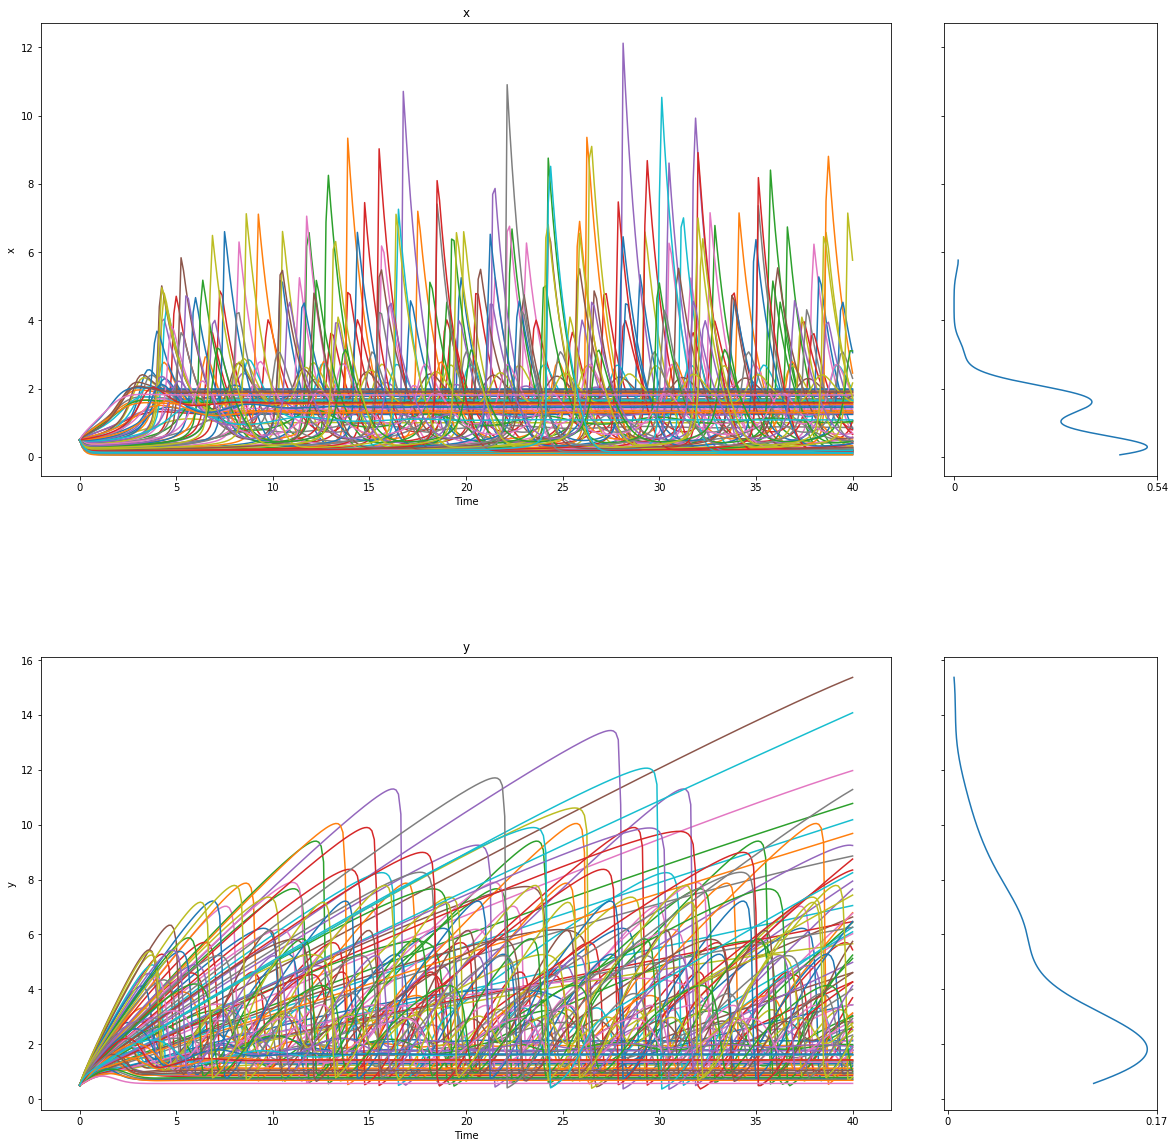

In [6]:
figure = emaplt.lines(results,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (20,20)
plt.show() #show figure

In [14]:
experiments

array([(1.71297074, 2.08630664, 240, 'None', 'Brusselator'),
       (0.58703632, 1.17549461, 241, 'None', 'Brusselator'),
       (0.3904563 , 2.45930358, 242, 'None', 'Brusselator'),
       (0.92639141, 2.84947352, 243, 'None', 'Brusselator'),
       (1.69672394, 2.6238401 , 244, 'None', 'Brusselator'),
       (0.7741602 , 4.95281053, 245, 'None', 'Brusselator'),
       (1.03157743, 2.50186122, 246, 'None', 'Brusselator'),
       (0.99006134, 1.05831111, 247, 'None', 'Brusselator'),
       (1.91826097, 3.84846364, 248, 'None', 'Brusselator'),
       (0.28127837, 4.20923421, 249, 'None', 'Brusselator'),
       (1.74279313, 1.38686852, 250, 'None', 'Brusselator'),
       (1.60534757, 2.21496055, 251, 'None', 'Brusselator'),
       (0.83715918, 3.69407632, 252, 'None', 'Brusselator'),
       (0.6094203 , 2.96461797, 253, 'None', 'Brusselator'),
       (0.21211899, 1.80809243, 254, 'None', 'Brusselator'),
       (1.62822261, 2.42203536, 255, 'None', 'Brusselator'),
       (1.84221102, 3.54

In [15]:
import datetime
df_expt = pd.DataFrame(experiments) #convert experiments (array of tuples) into df
df_expt = df_expt.copy() #self-copy to circumvent errors
path = "./Data/" + str(datetime.date.today()) + "Experiments" + '.feather' #create path for saving
feather.write_dataframe(df_expt.iloc[:,0:2],path) #feather it!

In [16]:
def export_outcomes(outcomes, location = './Data/' ):
    """takes EMA outcomes and exports all time series for each outcome of interest as a .feather dataframe for easy
    import into R. Arguments: export_outcomes(name of EMA outcomes dict, desired save location). Save location must exist,
    defaults to './Data/'.
    
    """
     
    today = datetime.date.today()
    datestr = (str(today))  
    
    keylist = list(outcomes.keys())
    
    for k in keylist:
        df_temp = pd.DataFrame(outcomes[k])
        df_temp = df_temp.copy()
        path = location + datestr + k.replace(' ','') + '.feather'
        feather.write_dataframe(df_temp,path)

    return("Done.");

In [17]:
export_outcomes(outcomes)

'Done.'

In [1]:
outcomes

NameError: name 'outcomes' is not defined